## 청소년 범죄 영향 인자 분석

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

In [2]:
n_crime = pd.read_csv('../data/nightlife_crime.csv', encoding='euc-kr')
t_crime = pd.read_csv('../data/crime_teenager.csv', encoding='euc-kr')

In [3]:
## 그래프 한글 폰트 패치
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc('font',family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system')

In [4]:
n_crime.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
0,강남,283,354,637,0,6,19,140,176,3,21,310,2484,2604
1,강동,146,106,252,0,3,6,193,158,4,6,156,2366,2712
2,강북,79,128,207,0,0,9,166,210,7,14,153,1434,2649
3,강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207
4,관악,223,99,322,0,2,14,170,209,9,12,320,2706,3298


In [5]:
t_crime.head()

,location,murder,robbery,forcible_rape,thief,violence
0,중 부,0,0,1,44,42
1,종 로,0,3,4,34,57
2,남대문,0,0,0,43,4
3,서대문,0,4,5,142,103
4,혜 화,0,2,2,38,29


In [6]:
## 컬럼 이름 변경
t_crime.rename(columns={'location': '구별', 'murder': '살인', 'robbery': '강도', 'forcible_rape': '강간', 'thief': '절도', 'violence': '폭행'}, inplace=True)

#### 범죄 발생건 수

In [7]:
print("전체 살인범죄 발생 건수 : %d" %(t_crime['살인']).sum())
print("전체 강도범죄 발생 건수 : %d" %(t_crime['강도']).sum())
print("전체 강간범죄 발생 건수 : %d" %(t_crime['강간']).sum())
print("전체 절도범죄 발생 건수 : %d" %(t_crime['절도']).sum())
print("전체 폭행범죄 발생 건수 : %d" %(t_crime['폭행']).sum())

전체 살인범죄 발생 건수 : 3
전체 강도범죄 발생 건수 : 57
전체 강간범죄 발생 건수 : 243
전체 절도범죄 발생 건수 : 3685
전체 폭행범죄 발생 건수 : 3619


#### 구별 범죄 발생 건 수

In [8]:
def gu_total(x):
    result = x[0]+x[1]+x[2]+x[3]+x[4]
    return result

# 구별 범죄발생건수 합계 열 생성
t_crime['합계'] = t_crime[['살인','강도','강간','절도','폭행']].apply(gu_total,axis=1)

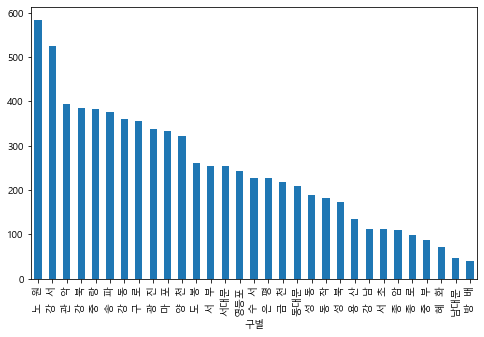

In [9]:
# 구별 총 범죄 발생 건 수 파악

gu_grouped_1 = t_crime.groupby('구별')['합계'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
gu_grouped_1.plot(kind='bar')

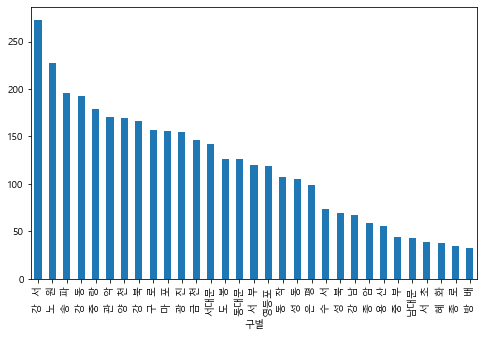

In [10]:
# 구별 '절도' 발생건수 파악
gu_grouped_2 = t_crime.groupby('구별')['절도'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
gu_grouped_2.plot(kind='bar')

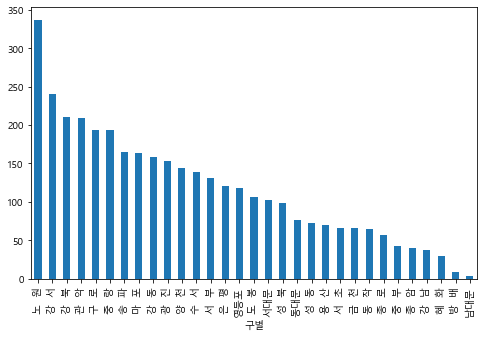

In [11]:
# 구별 '폭행' 발생건수 파악
gu_grouped_2 = t_crime.groupby('구별')['폭행'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
gu_grouped_2.plot(kind='bar')

> ```강서```,```노원```이 범죄발생건수에서 상위 2위 를 차지함 

> 범죄 발생건수 상위 2위인 ```강서구```,```노원구```의 유흥업소 현황 파악

In [12]:
노원 = n_crime[n_crime['region'] == "노원"]
강서 = n_crime[n_crime['region'] == "강서"]

In [13]:
노원

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
8,노원,30,57,87,0,6,14,227,337,10,7,197,2193,2723


In [14]:
강서

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
3,강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207


#### 구별 유흥업소 수 파악

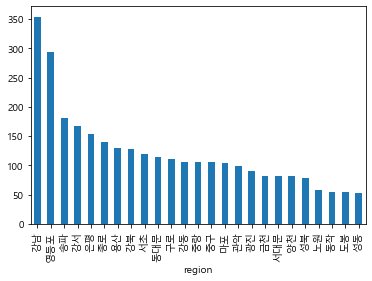

In [15]:
# 구별 단란주점 수 
karaoke_grouped = n_crime.groupby('region')['karaoke'].sum().sort_values(ascending=False).plot(kind='bar')

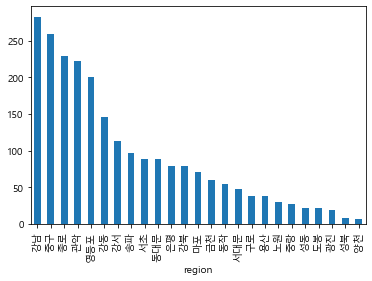

In [16]:
# 구별 유흥주점 수
karaoke_grouped = n_crime.groupby('region')['pub'].sum().sort_values(ascending=False).plot(kind='bar')

> 구별 청소년 범죄발생건수의 경우 ```노원```,```강서구```가 상위 2위 이내였지만 유흥업소 수의 경우 중위권

> 유흥업소 개수의 경우, 구별 인구수,소득수준 등 다양한 요인에 의한것이므로 유흥업소 수와 청소년 범죄발생건수의 비교 힘듦

#### 구별 청소년 범죄 비율 파악

> 구별 청소년 범죄발생 건수의 경우도 구별 인구수등 요인에 의해 절대적 비교 힘드므로 청소년 범죄발생 비율 파악

In [17]:
n_crime.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
0,강남,283,354,637,0,6,19,140,176,3,21,310,2484,2604
1,강동,146,106,252,0,3,6,193,158,4,6,156,2366,2712
2,강북,79,128,207,0,0,9,166,210,7,14,153,1434,2649
3,강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207
4,관악,223,99,322,0,2,14,170,209,9,12,320,2706,3298


In [18]:
def all_total(x):
    result = x[0]+x[1]+x[2]+x[3]+x[4]
    return result

# t_crime 데이터 이상함. n_crime 데이터만 사용하기위해 청소년 범죄 합계열 새로 생성
# 구별 청소년 범죄발생건수 합계 열 생성
n_crime['Young_Total'] = n_crime[['murder','robbery','forcible_rape','thef','violence']].apply(all_total,axis=1)

# 구별 전체(청소년+성인) 범죄발생건수 합계 열 생성
n_crime['All_Total'] = n_crime[['murder_tot','robbery_Tot','forcible_rape_Tot','thef_tot','violence_Tot']].apply(all_total,axis=1)

def adult_total(x):
    result = x[1]-x[0]
    return result 
# 구별 성인 범죄발생건수 합계 열 생성 
n_crime['Adult_Total'] = n_crime[['Young_Total','All_Total']].apply(adult_total,axis=1)

####### 구별 인구수,면적에 대한 고려없이 비율 생성은 의미없음 ############
# 구별 청소년 범죄 비율 열 생성
# def rate(x):
#     result = x[0] / x[1] * 100
#     return result
# n_crime['rate'] = n_crime[['Young_Total','All_Total']].apply(rate,axis=1)

In [19]:
n_crime.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot,Young_Total,All_Total,Adult_Total
0,강남,283,354,637,0,6,19,140,176,3,21,310,2484,2604,341,5422,5081
1,강동,146,106,252,0,3,6,193,158,4,6,156,2366,2712,360,5244,4884
2,강북,79,128,207,0,0,9,166,210,7,14,153,1434,2649,385,4257,3872
3,강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207,525,5585,5060
4,관악,223,99,322,0,2,14,170,209,9,12,320,2706,3298,395,6345,5950


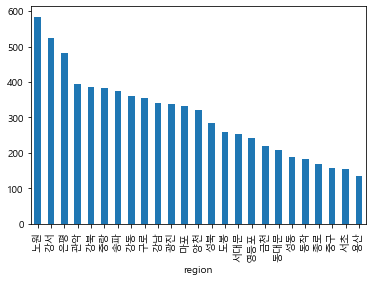

In [20]:
n_crime.groupby('region')['Young_Total'].sum().sort_values(ascending=False).plot(kind='bar')

In [21]:
## 청소년 범죄발생건수와 유흥업소관의 상관관계

n_crime[['pub','karaoke','tot_nightlife']].corrwith(n_crime['Young_Total'])

pub             -0.098486
karaoke          0.091557
tot_nightlife   -0.012519
dtype: float64

In [22]:
## 성인 범죄발생건수와 유흥업소간의 상관관계

n_crime[['pub','karaoke','tot_nightlife']].corrwith(n_crime['Adult_Total'])

pub              0.306165
karaoke          0.366785
tot_nightlife    0.367955
dtype: float64

#### 서울시 인구데이터 추가

In [23]:
ss = pd.read_csv('../data/서울시 연령별 인구수.txt',sep='\t',thousands=',')

In [24]:
# ss

In [25]:
ss = ss.drop('기간',axis=1)

In [26]:
young_ss = ss[ss['구분'] == '한국인'][['행정구역별','15~19세','계']]
young_ss.head()

,행정구역별,15~19세,계
1,합계,461918,9757144
4,종로구,6857,152026
7,중구,4338,126143
10,용산구,9340,229122
13,성동구,12541,304936


In [27]:
# 합계행 제거
young_ss.drop(1,axis=0,inplace=True)

In [28]:
# 15~19세 열 int형으로 변환
# young_ss.astype('float')
young_ss['15~19세'] = pd.to_numeric(young_ss['15~19세'], errors='coerce')
young_ss['계'] = pd.to_numeric(young_ss['계'], errors='coerce')

In [29]:
young_ss.sort_values(by='15~19세',ascending=False)

,행정구역별,15~19세,계
73,송파구,33905,679247
34,노원구,33429,538350
70,강남구,32450,542498
46,양천구,28813,461051
49,강서구,26467,595602
67,서초구,23594,431360
37,은평구,23345,483730
25,성북구,22040,440397
76,강동구,20820,424235
64,관악구,18311,502089


In [30]:
young_ss.head(1)

,행정구역별,15~19세,계
4,종로구,6857,152026


In [31]:
# 데이터셋 합치기 위해
n_crime['region'] = n_crime['region'] +"구"

young_ss.rename(columns={young_ss.columns[0] :"region"}, inplace = True)
young_ss.rename(columns={young_ss.columns[2] :"구별인구총계"}, inplace = True)

In [32]:
crime_anal = pd.merge(n_crime,young_ss)

In [33]:
crime_anal.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot,Young_Total,All_Total,Adult_Total,15~19세,구별인구총계
0,강남구,283,354,637,0,6,19,140,176,3,21,310,2484,2604,341,5422,5081,32450,542498
1,강동구,146,106,252,0,3,6,193,158,4,6,156,2366,2712,360,5244,4884,20820,424235
2,강북구,79,128,207,0,0,9,166,210,7,14,153,1434,2649,385,4257,3872,13986,315587
3,강서구,113,167,280,0,3,9,273,240,7,13,262,2096,3207,525,5585,5060,26467,595602
4,관악구,223,99,322,0,2,14,170,209,9,12,320,2706,3298,395,6345,5950,18311,502089


#### 구별 청소년 인구수 대비 범죄율

In [34]:
crime_anal['total_rate'] = crime_anal['All_Total'] / crime_anal['구별인구총계'] * 100

crime_anal['10_rate'] = crime_anal['Young_Total'] / crime_anal['15~19세'] * 100

crime_anal['pub_rate'] = crime_anal['pub'] / crime_anal['15~19세'] * 100 
crime_anal['karaoke_rate'] = crime_anal['karaoke'] / crime_anal['15~19세'] * 100 
crime_anal['nightlife_rate'] = crime_anal['tot_nightlife'] / crime_anal['15~19세'] * 100 

# crime_anal[['region','10_rate']].sort_values(by='10_rate',ascending=False)

In [35]:
crime_anal.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,...,Young_Total,All_Total,Adult_Total,15~19세,구별인구총계,total_rate,10_rate,pub_rate,karaoke_rate,nightlife_rate
0,강남구,283,354,637,0,6,19,140,176,3,...,341,5422,5081,32450,542498,0.999451,1.050847,0.872111,1.090909,1.963020
1,강동구,146,106,252,0,3,6,193,158,4,...,360,5244,4884,20820,424235,1.236107,1.729107,0.701249,0.509126,1.210375
2,강북구,79,128,207,0,0,9,166,210,7,...,385,4257,3872,13986,315587,1.348915,2.752753,0.564851,0.915201,1.480051
3,강서구,113,167,280,0,3,9,273,240,7,...,525,5585,5060,26467,595602,0.937707,1.983602,0.426947,0.630974,1.057921
4,관악구,223,99,322,0,2,14,170,209,9,...,395,6345,5950,18311,502089,1.263720,2.157173,1.217847,0.540659,1.758506


> 인구수 고려하지 않고 청소년 범죄 발생횟수만 비교하였을경우 노원,강서구가 상위권을 차지하였으나 인구수 대비 비율을 비교하였을 경우 강북,종로,금천구가 상위권을 차지

In [36]:
# 인구수 대비 청소년범죄율과 유흥업소 상관관계

crime_anal[['pub_rate','karaoke_rate','nightlife_rate']].corrwith(crime_anal['10_rate'])

pub_rate          0.331746
karaoke_rate      0.279559
nightlife_rate    0.327754
dtype: float64

In [37]:
# 인구수 대비 전체 범죄율과 유흥업소 상관관계

crime_anal[['pub_rate','karaoke_rate','nightlife_rate']].corrwith(crime_anal['total_rate'])

pub_rate          0.436267
karaoke_rate      0.618548
nightlife_rate    0.540882
dtype: float64

#### 연령대별 범죄율과 유흥업소간 상관관계 분석

In [38]:
age_ss = ss[ss['구분'] == '한국인'][['행정구역별','15~19세', '20~24세', '25~29세', '30~34세', '35~39세', '40~44세', '45~49세', '50~54세', '55~59세','60~64세','65~69세']]
age_ss.drop(1,axis=0,inplace=True)
age_ss.head()

,행정구역별,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세
4,종로구,6857,10982,12571,10311,10601,10010,13336,12740,12971,11113,7756
7,중구,4338,7766,10612,10114,10574,8695,10078,10201,10801,9816,6848
10,용산구,9340,13909,18863,18390,19847,16610,19981,18243,18169,16084,10951
13,성동구,12541,20845,25783,24640,27340,22610,25658,24414,24611,20948,13895
16,광진구,15728,26711,35060,29782,29643,25445,29863,28266,27985,23883,15601


In [39]:
age_ss['10대'] = age_ss['15~19세']
age_ss["20대"] = age_ss['20~24세'] + age_ss['25~29세']
age_ss["30대"] = age_ss['30~34세'] + age_ss['35~39세']
age_ss["40대"] = age_ss['40~44세'] + age_ss['45~49세']
age_ss["50대"] = age_ss['50~54세'] + age_ss['55~59세']
age_ss["60대"] = age_ss['60~64세'] + age_ss['65~69세']

In [40]:
age_ss.drop(['15~19세', '20~24세', '25~29세', '30~34세', '35~39세', '40~44세', '45~49세', '50~54세', '55~59세','60~64세','65~69세'],axis=1,inplace=True)

In [41]:
age_ss.rename(columns={age_ss.columns[0] :"region"}, inplace = True)

crime_anal_res = pd.merge(crime_anal,age_ss)

In [42]:
crime_anal_res.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,...,10_rate,pub_rate,karaoke_rate,nightlife_rate,10대,20대,30대,40대,50대,60대
0,강남구,283,354,637,0,6,19,140,176,3,...,1.050847,0.872111,1.090909,1.963020,32450,76449,86571,99376,79502,56937
1,강동구,146,106,252,0,3,6,193,158,4,...,1.729107,0.701249,0.509126,1.210375,20820,57803,65427,68082,70437,55255
2,강북구,79,128,207,0,0,9,166,210,7,...,2.752753,0.564851,0.915201,1.480051,13986,43431,42003,49548,53914,43322
3,강서구,113,167,280,0,3,9,273,240,7,...,1.983602,0.426947,0.630974,1.057921,26467,87775,105109,93799,90403,72171
4,관악구,223,99,322,0,2,14,170,209,9,...,2.157173,1.217847,0.540659,1.758506,18311,107268,89928,71596,70016,56651


In [46]:
# crime_anal['total_rate'] = crime_anal['All_Total'] / crime_anal['구별인구총계'] * 100

crime_anal_res['10_rate'] = crime_anal_res['Young_Total'] / crime_anal_res['10대'] * 100 
crime_anal_res['20_rate'] = crime_anal_res['Adult_Total'] / crime_anal_res['20대'] * 100 
crime_anal_res['30_rate'] = crime_anal_res['Adult_Total'] / crime_anal_res['30대'] * 100 
crime_anal_res['40_rate'] = crime_anal_res['Adult_Total'] / crime_anal_res['40대'] * 100 
crime_anal_res['50_rate'] = crime_anal_res['Adult_Total'] / crime_anal_res['50대'] * 100 
crime_anal_res['60_rate'] = crime_anal_res['Adult_Total'] / crime_anal_res['60대'] * 100 

In [85]:
crime_anal_res.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,...,20대,30대,40대,50대,60대,20_rate,30_rate,40_rate,50_rate,60_rate
0,강남구,283,354,637,0,6,19,140,176,3,...,76449,86571,99376,79502,56937,6.646261,5.869171,5.112905,6.391034,8.923898
1,강동구,146,106,252,0,3,6,193,158,4,...,57803,65427,68082,70437,55255,8.449388,7.464808,7.173702,6.933856,8.839019
2,강북구,79,128,207,0,0,9,166,210,7,...,43431,42003,49548,53914,43322,8.915291,9.218389,7.814644,7.181808,8.937722
3,강서구,113,167,280,0,3,9,273,240,7,...,87775,105109,93799,90403,72171,5.764739,4.814050,5.394514,5.597159,7.011126
4,관악구,223,99,322,0,2,14,170,209,9,...,107268,89928,71596,70016,56651,5.546855,6.616404,8.310520,8.498058,10.502904


In [82]:
df = crime_anal_res[['10_rate','20_rate','30_rate','40_rate','50_rate','60_rate','pub_rate','karaoke_rate','nightlife_rate']].corr()

In [83]:
df.drop(['10_rate','20_rate','30_rate','40_rate','50_rate','60_rate'],inplace=True)
df.drop(['pub_rate','karaoke_rate','nightlife_rate'], axis=1 ,inplace=True)

In [84]:
df

,10_rate,20_rate,30_rate,40_rate,50_rate,60_rate
pub_rate,0.331746,0.372500,0.484753,0.448790,0.421258,0.391536
karaoke_rate,0.279559,0.646818,0.606097,0.615268,0.603020,0.572624
nightlife_rate,0.327754,0.513790,0.565442,0.547197,0.524792,0.493086


In [57]:
import seaborn as sns

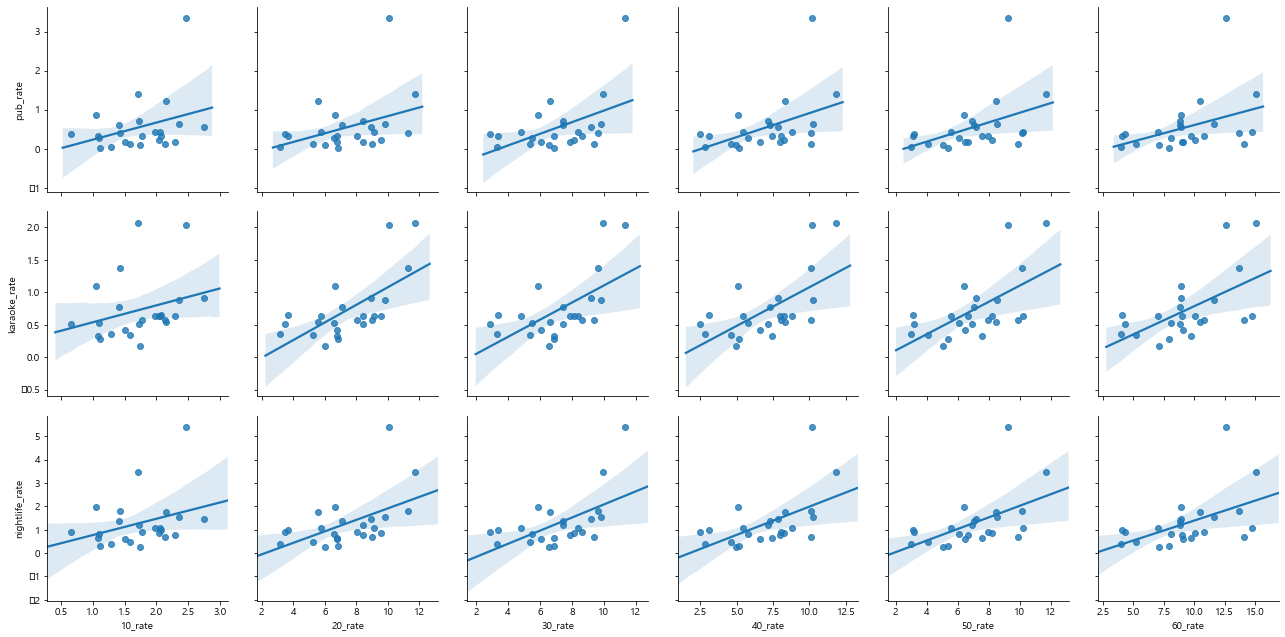

In [70]:

sns.pairplot(crime_anal_res, x_vars=['10_rate','20_rate','30_rate','40_rate','50_rate','60_rate'],
             y_vars=['pub_rate','karaoke_rate','nightlife_rate'] ,kind='reg',size=)

In [88]:
ttt = pd.read_csv('../data/2017년.csv', encoding='euc-kr')

In [92]:
ttt

,구분,연령,범죄자수
0,중부 살인,14미만,0
1,중부 살인,14세,0
2,중부 살인,15세,0
3,중부 살인,16세,0
4,중부 살인,17세,0
...,...,...,...
1235,수서 폭력,56~60,163
1236,수서 폭력,61~64,93
1237,수서 폭력,65~70,90
1238,수서 폭력,71이상,61


In [91]:
ttt.groupby('연령').sum()

,범죄자수
연령,
14미만,2
14세,439
15세,626
16세,759
17세,853
18세,1118
19세,1288
20세,1070
21~25,7078
